In [2]:
!pip install transformers

  Using cached transformers-4.46.3-py3-none-any.whl.metadata (44 kB)
  Using cached huggingface_hub-0.26.2-py3-none-any.whl.metadata (13 kB)
  Using cached tokenizers-0.20.3-cp312-none-win_amd64.whl.metadata (6.9 kB)
  Using cached safetensors-0.4.5-cp312-none-win_amd64.whl.metadata (3.9 kB)
Using cached transformers-4.46.3-py3-none-any.whl (10.0 MB)
Using cached huggingface_hub-0.26.2-py3-none-any.whl (447 kB)
Using cached safetensors-0.4.5-cp312-none-win_amd64.whl (286 kB)
Using cached tokenizers-0.20.3-cp312-none-win_amd64.whl (2.4 MB)


In [25]:
import numpy 
from transformers import CLIPModel, CLIPProcessor
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [4]:
import torch
print(torch.__version__)

2.5.1+cpu


In [6]:
%cd "C:\Users\Dell\Documents\GitHub\Image-based-Recommendataion-System"

C:\Users\Dell\Documents\GitHub\Image-based-Recommendataion-System


In [7]:
sample_img = './images.jpg'
decription = 'Round toed, black sports shoes with red accents, low top styling and central lace-ups.'
display_name = 'uma Men Black 65CC Lo Ducati Sports Shoes'
category = 'Sports Shoes'

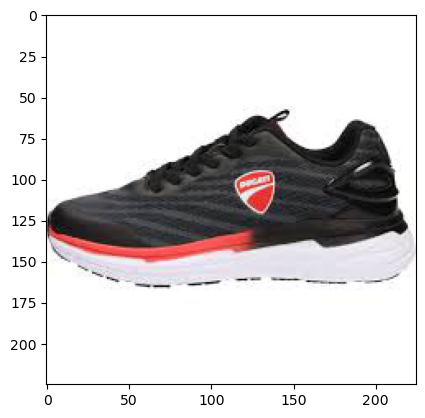

In [10]:
img = Image.open(sample_img).convert("RGB")
plt.imshow(img)

In [12]:
input_text = f'{decription} {display_name} Category: {category}'
print(input_text)

Round toed, black sports shoes with red accents, low top styling and central lace-ups. uma Men Black 65CC Lo Ducati Sports Shoes Category: Sports Shoes


In [13]:
### loading clip model and processor
mn = "openai/clip-vit-base-patch32"
model = CLIPModel.from_pretrained(mn)
processor = CLIPProcessor.from_pretrained(mn)

config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

c:\Users\Dell\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Dell\.cache\huggingface\hub\models--openai--clip-vit-base-patch32. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

In [20]:
input = processor(
    text=[category],
    images=img,
    return_tensors='pt',
    padding=True
    )

In [21]:
print(input.keys())

dict_keys(['input_ids', 'attention_mask', 'pixel_values'])


In [22]:
## generate embeddings

o = model(**input)

text_embed = o.text_embeds.detach().numpy()
img_embed = o.image_embeds.detach().numpy()

print(text_embed.shape, img_embed.shape)
print('='* 20)

(1, 512) (1, 512)


In [27]:
## embedding spaces
combined = np.vstack((text_embed, img_embed))
labels = ['Text Embedding', 'Image Embedding']


pca = PCA(n_components=2)

pca_result = pca.fit_transform(combined)


In [23]:
## computing similarity 

s = cosine_similarity(text_embed, img_embed)
print("Similarity Score:", s[0][0])

Similarity Score: 0.2913803


CLIP is trained to understand how images and text relate, but the embeddings it generates are from different modalities (text and image), so even if they are related, their vectors might not always be very close in the vector space

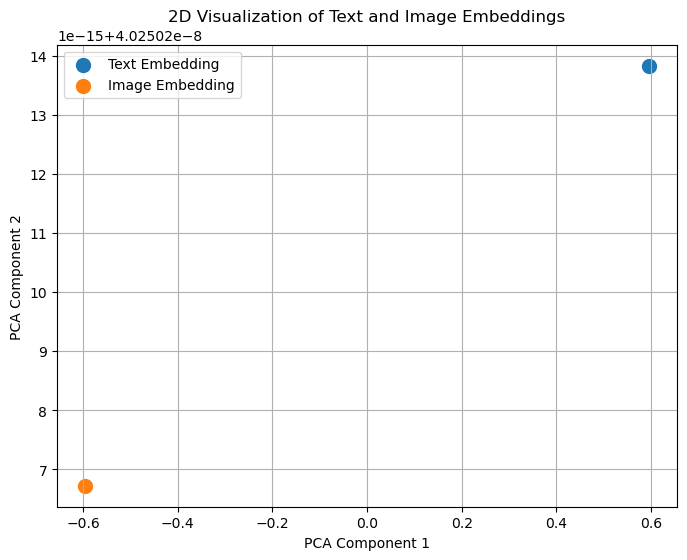

In [29]:
plt.figure(figsize=(8, 6))
for i, label in enumerate(labels):
    plt.scatter(pca_result[i, 0], pca_result[i, 1], label=label, s=100)

plt.title("2D Visualization of Text and Image Embeddings")
plt.legend()
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid()
plt.show()

---
---

In [ ]:
# actual data
